<a href="https://colab.research.google.com/github/eka23sokol/finall_project/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B0%D1%8F_%D0%95%D0%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src = https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPlbWWUOHRtry-mZ0SkGBpzah3ild6qpcKKA&s alt="drawing" style="width:400px;">


# <center> Дипломный проект:
# Модель прогнозирования стоимости жилья для агентства недвижимости

### <center> Выполнила Сокольская Екатерина Григорьевна

**Постановка задачи:**

разработать модель, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок.

In [ ]:

# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import dtale

from datetime import date
from geopy.geocoders import Nominatim
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import plotly
import plotly.express as px
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import ensemble
from catboost import CatBoostRegressor
import optuna
import comet_ml
from comet_ml import Experiment

In [ ]:
# прочитаем файл с исходными данными
data = pd.read_csv("data.csv")
print('Train data shape: {}'.format(data.shape))
data.head()

Train data shape: (377185, 18)


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


**Описание данных:**

➔ 'status' — статус продажи;

➔ 'private pool' и 'PrivatePool' — наличие собственного бассейна;

➔ 'propertyType' — тип объекта недвижимости;

➔ 'street' — адрес объекта;

➔ 'baths' — количество ванных комнат;

➔ 'homeFacts' — сведения о строительстве объекта (содержит несколько типов сведений, влияющих на оценку объекта);

➔ 'fireplace' — наличие камина;

➔ 'city' — город;

➔ 'schools' — сведения о школах в районе;

➔ 'sqft' — площадь в футах;

➔ 'zipcode' — почтовый индекс;

➔ 'beds' — количество спален;

➔ 'state' — штат;

➔ 'stories' — количество этажей;

➔ 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система мультилистинга);

➔ 'target' — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать).

## 1.  Разведывательный анализ и очистка исходных данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [ ]:
d = dtale.show(data)
d

Посмотрим на пропуски. Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы):

In [ ]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

private pool    98.891525
mls-id          93.387330
PrivatePool     89.312672
fireplace       72.662221
stories         39.958111
baths           28.192532
beds            24.200856
MlsId           17.731352
sqft            10.757851
status          10.583136
propertyType     9.208479
target           0.657767
city             0.009014
street           0.000530
dtype: float64

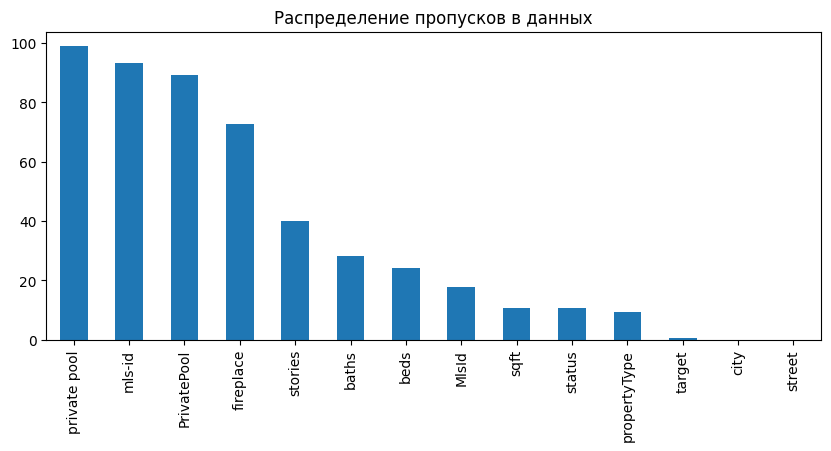

In [ ]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

Предварительно создадим копию исходной таблицы — drop_data, чтобы не повредить её. Зададимся порогом в 70 %: будем оставлять только те столбцы, в которых 70 и более процентов записей не являются пустыми.

In [ ]:
#создаем копию исходной таблицы
drop_data = data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.3
#удаляем столбцы, в которых более 70% пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)

In [ ]:
drop_data

,status,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,state,stories,MlsId,target
0,Active,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,611019,"$418,000"
1,for sale,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,201916904,"$310,000"
2,for sale,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,FR19221027,"$2,895,000"
3,for sale,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,14191809,"$2,395,000"
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,861745,"$5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...","4,017",33180,5,FL,0.0,A10702700,"$1,249,000"
377181,for sale,condo,3530 N Lake Shore Dr #4B,3 Baths,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...","2,000 sqft",60657,3 Beds,IL,9.0,10374233,"$674,999"
377182,for sale,single-family home,15509 Linden Blvd,3 Baths,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...","1,152 sqft",11434,3 Beds,NY,2,NaN,"$528,000"
377183,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",Houston,"[{'rating': ['NA', 'NA', 'NA'], 'data': {'Dist...",NaN,77028,"8,479 sqft",TX,NaN,NaN,"$34,500"


In [ ]:
dupl_columns = list(drop_data.columns)
mask = data.duplicated(subset=dupl_columns)
data_duplicates = data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')

Число найденных дубликатов: 50


In [ ]:
data_dedupped = drop_data.drop_duplicates(subset=dupl_columns)
print('Train data shape: {}'.format(data_dedupped.shape))

Train data shape: (377135, 14)


In [ ]:
# приведём строки в полях propertyType и status к нижнему регистру
data_dedupped['propertyType'] = data_dedupped['propertyType'].str.lower()
data_dedupped['status'] = data_dedupped['status'].str.lower()

C:\Users\User\AppData\Local\Temp\ipykernel_16096\105137970.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_16096\105137970.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# создадим функцию обработки признака status
def get_status(status):
    if status in ['foreclosed', 'foreclosure']:
        return  'foreclosed'
    elif status in ['pre-foreclosure', 'pre-foreclosure / auction']:
        return 'pre foreclosure'
    elif status in ['under contract show', 'under contract showing', 'active under contract', 'under contract']:
        return 'under contract showing'
    elif status in ['under contract backups',  'active backup', 'backup contract']:
        return 'under contract backups'
    elif status in ['auction', '/ auction']:
        return 'auction'
    elif status in ['active', 'a active']:
        return 'active'
    else:
        return status

In [ ]:
# функция выделения основных статусов
def get_basic_status(status):
    if status not in ['for sale', 'active', 'foreclosed', 'new construction', 'pending', 'pre foreclosure', 'under contract showing']:
        return 'other'
    else:
        return status

In [ ]:
data_dedupped['status'] = data_dedupped['status'].apply(get_status)
data_dedupped['status'] = data_dedupped['status'].apply(get_basic_status)

C:\Users\User\AppData\Local\Temp\ipykernel_16096\484667821.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_16096\484667821.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# создадим функцию обработки признака propertyType
def get_propertyType (propertyType):
    if propertyType in ['manufactured home (house)', 'mobile', 'prefab', 'modular', 'mo2 le', 'mo2le', 'mobile/manufactured', 'mfd/mobile home', 'mobile / manufactured']:
        return 'manufactured home (house)'
    elif propertyType in ['cabin', 'ca2 n', 'ca2n']:
        return 'cabin'
    elif propertyType in ['midcentury', 'mid century', 'mid-century']:
        return 'midcentury'
    elif propertyType in ['single family', 'single-family home', 'single family home', 'single detached', 'single detached, traditional', 'singlefamilyresidence', 'detached', 'single detached, contemporary/modern', 'single detached, ranch']:
        return 'single family'
    elif propertyType in ['multi-family', 'multi family', 'multi-family home']:
        return 'multi-family'
    elif propertyType in ['lot/land', 'land']:
        return 'land'
    elif propertyType in ['1 story', 'one story', 'detached, one story', '1 story, traditional', '1 story, contemporary']:
        return '1 story'
    elif propertyType in ['2 stories', 'two story', '2 story', '2 stories, traditional', 'detached, two story', '2 stories, contemporary']:
        return '2 story'
    elif propertyType in ['ranch', 'farms/ranches', 'ranch, traditional', 'ranch, one story', 'detached, ranch, one story']:
        return 'ranch'
    elif propertyType in ['townhouse', 'condo/townhome/row home/co-op', 'condo/townhome, traditional', 'condo/townhome', 'condo/townhome, contemporary/modern', 'townhouse, modern']:
        return 'townhouse'
    elif propertyType in ['contemporary', 'contemporary/modern', 'contemporary/modern, traditional']:
        return 'contemporary'
    elif propertyType in ['coop', 'cooperative']:
        return 'cooperative'
    elif propertyType in ['traditional', 'traditional, transitional']:
        return 'traditional'
    elif propertyType in ['mediterranean', 'spanish/mediterranean', 'spanish']:
        return 'mediterranean'
    elif propertyType in ['condo', 'condominium (single level), contemporary', 'condominium (single level)']:
        return 'condo'
    else:
        return propertyType

In [ ]:
# функция выделения основных типов объектов недвижимости
def get_basic_propertyType(propertyType):
    if propertyType not in ['single family', 'condo', 'land', 'townhouse', 'multi-family', 'traditional', 'cooperative', '1 story', 'manufactured home (house)', 'contemporary', '2 story', 'ranch', 'high rise', 'colonial', 'apartment', 'transitional', 'florida', 'mediterranean', 'bungalow', 'garden home', 'cape cod', 'craftsman']:
        return 'other'
    else:
        return propertyType

In [ ]:
data_dedupped['propertyType'] = data_dedupped['propertyType'].apply(get_propertyType)
data_dedupped['propertyType'] = data_dedupped['propertyType'].apply(get_basic_propertyType)

C:\Users\User\AppData\Local\Temp\ipykernel_16096\2739804631.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_16096\2739804631.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'stories': 'unknown',
    'baths': 'unknown',
    'beds': 'unknown',
    'sqft': 'unknown',
    'city': data_dedupped['city'].mode()[0],
    'street': 'unknown'
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = data_dedupped.fillna(values)
# удалим поле MlsId и записи с отсутствующим значением target
fill_data = fill_data.drop('MlsId', axis=1)
fill_data = fill_data.dropna(how='any', axis=0)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

status          0.0
propertyType    0.0
street          0.0
baths           0.0
homeFacts       0.0
city            0.0
schools         0.0
sqft            0.0
zipcode         0.0
beds            0.0
state           0.0
stories         0.0
target          0.0
dtype: float64

## 2.  Проектирование признаков.

In [ ]:
# создадим функцию вывода года постройки
def get_Year_built (homeFacts):
    homeFacts = ast.literal_eval(homeFacts)
    li = homeFacts['atAGlanceFacts']
    for item in li:
        if item['factLabel'] == 'Year built':
            Year_built = item['factValue']
            if Year_built not in ['', None, 'No Data']:
                return int(Year_built)
            else:
                return 0


# функция вывода года реконструкции
def get_Remodeled_year (homeFacts):
    homeFacts = ast.literal_eval(homeFacts)
    li = homeFacts['atAGlanceFacts']
    for item in li:
        if item['factLabel'] == 'Remodeled year':
            Remodeled_year = item['factValue']
            if Remodeled_year not in ['', None, 'No Data']:
                return int(Remodeled_year)
            else:
                return 0


# функция вывода типа обогрева
def get_Heating (homeFacts):
    homeFacts = ast.literal_eval(homeFacts)
    li = homeFacts['atAGlanceFacts']
    for item in li:
        if item['factLabel'] == 'Heating':
            Heating = item['factValue']
            if Heating not in ['', None, 'No Data']:
                return Heating
            else:
                return 'unknow'


# функция преобразования типа обогрева
def get_HeatingType (Heating):
    if Heating in ['Forced air']:
        return 'Forced Аir'
    else:
        return Heating


# функция вывода типа охлаждения
def get_Cooling (homeFacts):
    homeFacts = ast.literal_eval(homeFacts)
    li = homeFacts['atAGlanceFacts']
    for item in li:
        if item['factLabel'] == 'Cooling':
            Cooling = item['factValue']
            if Cooling not in ['', None, 'No Data']:
                return Cooling
            else:
                return 'unknow'


# функция вывода типа стоянки
def get_Parking (homeFacts):
    homeFacts = ast.literal_eval(homeFacts)
    li = homeFacts['atAGlanceFacts']
    for item in li:
        if item['factLabel'] == 'Parking':
            Parking = item['factValue']
            if Parking not in ['', None, 'No Data']:
                return Parking
            else:
                return 'unknow'


# функция вывода данных об участке
def get_Lotsize (homeFacts):
    homeFacts = ast.literal_eval(homeFacts)
    li = homeFacts['atAGlanceFacts']
    for item in li:
        if item['factLabel'] == 'lotsize':
            Lotsize = item['factValue']
            if Lotsize not in ['', None, 'No Data', '—', '-- sqft lot']:
                return Lotsize
            else:
                return 'unknow'


# функция вывода данных о цене за квадратный фут (в долларах)
def get_Price_sqft (homeFacts):
    homeFacts = ast.literal_eval(homeFacts)
    li = homeFacts['atAGlanceFacts']
    for item in li:
        if item['factLabel'] == 'Price/sqft':
            Price_sqft = item['factValue']
            if Price_sqft not in ['', None, 'No Data', 'No Info']:
                return Price_sqft
            else:
                return 'unknow'

In [ ]:
fill_data['Year built'] = fill_data['homeFacts'].apply(get_Year_built)
fill_data['Remodeled year'] = fill_data['homeFacts'].apply(get_Remodeled_year)
fill_data['Heating'] = fill_data['homeFacts'].apply(get_Heating)
fill_data['Heating'] = fill_data['Heating'].apply(get_HeatingType)
fill_data['Cooling'] = fill_data['homeFacts'].apply(get_Cooling)
fill_data['Parking'] = fill_data['homeFacts'].apply(get_Parking)
fill_data['Lotsize'] = fill_data['homeFacts'].apply(get_Lotsize)
fill_data['Price/sqft'] = fill_data['homeFacts'].apply(get_Price_sqft)

In [ ]:
# удалим поле homeFacts
fill_data = fill_data.drop('homeFacts', axis=1)

In [ ]:
# функция вывода данных о среднем рейтинге школ в районе
def get_average_rating_schools (schools):
    schools = ast.literal_eval(schools)
    li = list(schools[0].values())[0]
    if len(li) != 0:
        li_n = []
        for i in li:
            parts = i.rsplit('/', 1)
            li_n.append(parts[0])
        li_int = [n for n in li_n if n.isdigit()]
        li_int = [int(x) for x in li_int]
        if len(li_int) != 0:
            avg_rat_school = sum(li_int)/len(li_int)
            return round(avg_rat_school,1)
        else:
            return 0
    else:
        return 0

In [ ]:
# функция вывода данных о среднем расстоянии до школы
def get_average_distance_schools (schools):
    schools = ast.literal_eval(schools)
    dict = list(schools[0].values())[1]
    li_dist = list(dict.values())[0]
    if len(li_dist) != 0:
        li_n = []
        for i in li_dist:
            floats = re.sub(r'[^\d.-]', '', i)
            li_n.append(floats)
        li_floats = [np.float16(x) for x in li_n]
        if len(li_floats) != 0:
             avg_dist_school = sum(li_floats)/len(li_floats)
             return round(avg_dist_school,1)
        else:
            return 0
    else:
        return 0

In [ ]:
fill_data['Average_rating_schools'] = fill_data['schools'].apply(get_average_rating_schools)
fill_data['Average_distance_schools'] = fill_data['schools'].apply(get_average_distance_schools)

In [ ]:
# удалим поле schools
fill_data = fill_data.drop('schools', axis=1)

In [ ]:
# функция удаления лишних символов и перевода числа в формат int
def get_int(str):
    li_int = [n for n in str if n.isdigit()]
    if li_int != []:
        chislo = int(''.join((i for i in li_int)))
        return chislo
    else:
        return 0


In [ ]:
fill_data['target'] = fill_data['target'].apply(get_int)
fill_data['Price/sqft'] = fill_data['Price/sqft'].apply(get_int)
fill_data['zipcode'] = fill_data['zipcode'].apply(get_int)

In [ ]:
# функция удаления лишних символов и перевода числа в формат float
def get_float(st):
    st = st.replace(",", ".")
    cnt_com = st.count('.')
    if cnt_com < 2:
        floats = re.sub(r'[^\d.-]', '', st)
        if floats not in ['', '..', '.'] and '-' not in floats:
            floats = round(np.float16(floats),1)
            return floats
        else:
            return 0
    else:
        return 0

In [ ]:
fill_data['baths'] = fill_data['baths'].apply(get_float)
fill_data['beds'] = fill_data['beds'].apply(get_float)
fill_data['sqft'] = fill_data['sqft'].apply(get_int)
fill_data['stories'] = fill_data['stories'].apply(get_float)

C:\Users\User\AppData\Local\Temp\ipykernel_16096\850953375.py:8: RuntimeWarning:

overflow encountered in cast



In [ ]:
# определим набор данных, в которых все значения индекса (zipcode) известны
fill_data = fill_data[fill_data['zipcode'] != 0]

In [ ]:
# удалим столбцы street и city, поскольку есть поле индекс
fill_data = fill_data.drop('street', axis=1)
fill_data = fill_data.drop('city', axis=1)

In [ ]:
# функция получения данных о размере участка в квадратных футах (sqft)
def get_Lotsize_sqft(Lotsize):
    words = Lotsize.split()
    if 'acres' in words:
        st = words[0].replace(",", ".")
        cnt_com = st.count('.')
        if cnt_com < 2:
            sqft = np.float16(st)*43560
            sqft = round(sqft,1)
            return str(sqft)
        else:
            st = words[0].replace(",", "")
            sqft = np.float16(st)*43560/100
            sqft = round(sqft,1)
            return str(sqft)
    else:
        return words[0]

In [ ]:
fill_data['Lotsize_sqft'] = fill_data['Lotsize'].apply(get_Lotsize_sqft)

In [ ]:
fill_data['Lotsize_sqft'] = fill_data['Lotsize_sqft'].apply(get_float)

C:\Users\User\AppData\Local\Temp\ipykernel_16096\850953375.py:8: RuntimeWarning:

overflow encountered in cast

C:\Users\User\AppData\Local\Temp\ipykernel_16096\850953375.py:8: RuntimeWarning:

overflow encountered in multiply



In [ ]:
# удалим поле Lotsize
fill_data = fill_data.drop('Lotsize', axis=1)

In [ ]:
# приведём строки в полях Heating, Cooling и Parking к нижнему регистру
fill_data['Heating'] = fill_data['Heating'].str.lower()
fill_data['Cooling'] = fill_data['Cooling'].str.lower()
fill_data['Parking'] = fill_data['Parking'].str.lower()

In [ ]:
# создадим функцию обработки признака Heating
def get_proc_Heating(Heating):
    if Heating in ['forced air', 'forced air heating', 'forced air, other', 'forced air, stove', 'forced аir', 'forced air - gas']:
        return  'forced air'
    elif Heating in ['electric', 'central electric', 'central, electric', 'electric heat', 'central electric, zoned', 'central electric, heat pump', ', electric hot air']:
        return 'electric'
    elif Heating in ['gas', 'natural gas heat', 'forced air, gas', 'gas heat', ', gas hot air/furnace', 'forced air, natural gas', 'central gas', 'natural gas']:
        return 'gas'
    elif Heating in ['heat pump',  'forced air, heat pump', ', heat pump - heat', 'heat pump(s)', 'central, heat pump']:
        return 'heat pump'
    elif Heating in ['central', 'heating system', 'central heating']:
        return 'central'
    elif Heating in ['central air', 'central air, ceiling fan(s)', 'central air conditioning', 'refrigeration']:
        return 'central air'
    elif Heating in ['wall', 'forced air, wall', 'wall heater']:
        return 'wall'
    elif Heating in ['baseboard', 'baseboard, forced air']:
        return 'baseboard'
    else:
        return Heating

In [ ]:
# функция выделения основных типов отопления
def get_basic_Heating(Heating):
    if Heating not in ['forced air', 'electric', 'gas', 'heat pump', 'central air', 'central', 'baseboard', 'wall', 'radiant', 'central furnace', 'oil']:
        return 'other'
    else:
        return Heating

In [ ]:
fill_data['Heating'] = fill_data['Heating'].apply(get_proc_Heating)
fill_data['Heating'] = fill_data['Heating'].apply(get_basic_Heating)

In [ ]:
# создадим функцию обработки признака Heating
def get_proc_Cooling(Cooling):
    if Cooling in ['has cooling', 'cooling system', 'refrigeration', 'refrigeration, ceiling fan(s)', 'central cooling', 'ceiling fan, central electric', 'refrigeration, ceiling fan(s), programmable thmstat', 'ceiling fan, central electric, heat pump', 'ceiling fans, central electric', 'ceiling fan(s)']:
        return  'has cooling'
    elif Cooling in ['electric', 'central electric', 'central a/c (electric), central heat (electric)', 'central, electric', '2 or more units, central, electric', 'central a/c (electric), central heat (gas)', 'electric heating', 'central electric, zoned', 'central electric, heat pump', 'central electric, central gas']:
        return 'electric'
    elif Cooling in ['central gas', 'gas heating', 'gas heating, forced air heating', 'central gas, zoned']:
        return 'gas'
    elif Cooling in ['heat pump', 'heat pump - ac', 'heat pump for a/c, heat pump for heat']:
        return 'heat pump'
    elif Cooling in ['central', 'central heating', 'central, other']:
        return 'central'
    elif Cooling in ['central air', 'central a/c', 'air conditioning-central', 'central air, gas (hot air)', 'central air, gas hot air/furnace, multizone a/c', 'central air, zoned', 'central air, gas hot air/furnace', 'central a/c (electric), central heat (gas), zoned', 'central a/c, ceiling fan(s)', 'central air, wall/window unit(s)', 'central air, heat pump for heat', 'central air, humidity control', 'central air, heat pump - ac']:
        return 'central air'
    elif Cooling in ['wall', 'central, wall', 'wall/window unit(s)', 'wall unit(s)']:
        return 'wall'
    elif Cooling in ['has heating', 'central heating, heat pump heating', 'central heating, 1 unit', 'forced air heating']:
        return 'has heating'
    elif Cooling in ['evaporative', 'steam heating']:
        return 'evaporative'
    elif Cooling in ['solar, refrigeration', 'central, solar']:
        return 'solar'
    else:
        return Cooling

In [ ]:
# функция выделения основных типов охлаждения
def get_basic_Cooling(Cooling):
    if Cooling not in ['has cooling', 'electric', 'gas', 'heat pump', 'central air', 'central', 'wall', 'evaporative', 'has heating', 'solar']:
        return 'other'
    else:
        return Cooling

In [ ]:
fill_data['Cooling'] = fill_data['Cooling'].apply(get_proc_Cooling)
fill_data['Cooling'] = fill_data['Cooling'].apply(get_basic_Cooling)

In [ ]:
# создадим функцию обработки признака Parking
def get_proc_Parking(Parking):
    if Parking in ['attached garage', 'attached garage, detached garage', 'attached garage, carport', 'attached garage, garage - 2 car', 'attached garage, off street', 'attached - front', 'garage-attached', 'attached - side', 'attached', 'attached - rear', 'attached - side, aggre', 'garage attached']:
        return  'attached garage'
    elif Parking in ['detached garage', 'detached garage, attached garage', 'detached garage, carport']:
        return 'detached garage'
    elif Parking in ['2 spaces', '2', 'garage - 2 car', '2 car garage, attached garage, opener']:
        return '2 spaces'
    elif Parking in ['1 space', '1']:
        return '1 space'
    elif Parking in ['carport', 'carport, attached garage', 'carport, off street', 'carport, detached garage', 'carport, attached garage, detached garage', 'carport spaces']:
        return 'carport'
    elif Parking in ['off street', 'off street parking', 'off street, attached garage', 'off street, on street', 'off street, detached garage', 'off street, carport']:
        return 'off street'
    elif Parking in ['4 spaces', '4']:
        return '4 spaces'
    elif Parking in ['3 spaces', '3']:
        return '3 spaces'
    elif Parking in ['5 spaces', '5']:
        return '5 spaces'
    elif Parking in ['6 spaces', '6']:
        return '6 spaces'
    elif Parking in ['7 spaces', '7']:
        return '7 spaces'
    elif Parking in ['8 spaces', '8']:
        return '8 spaces'
    elif Parking in ['parking desc', 'parking type', 'parking yn', 'slab parking spaces', 'parkingtype']:
        return 'parking desc'
    elif Parking in ['on street', 'on street, off street', 'on street, attached garage']:
        return 'on street'
    elif Parking in ['none', '0']:
        return 'no parking'
    elif Parking in ['driveway', 'driveway, garage door opener']:
        return 'driveway'
    else:
        return Parking

In [ ]:
# функция выделения основных типов парковки
def get_basic_Parking(Parking):
    if Parking not in ['attached garage', 'detached garage', '2 spaces', '1 space', 'carport', 'off street', '3 spaces', '4 spaces', 'no parking', 'parking desc', 'on street', 'driveway', '6 spaces', '5 spaces', '8 spaces', '7 spaces']:
        return 'other'
    else:
        return Parking

In [ ]:
fill_data['Parking'] = fill_data['Parking'].apply(get_proc_Parking)
fill_data['Parking'] = fill_data['Parking'].apply(get_basic_Parking)

In [ ]:
fill_data.to_csv('fill_data.csv', index = False)

In [ ]:
# fill_data = pd.read_csv("fill_data.csv")

<Axes: >

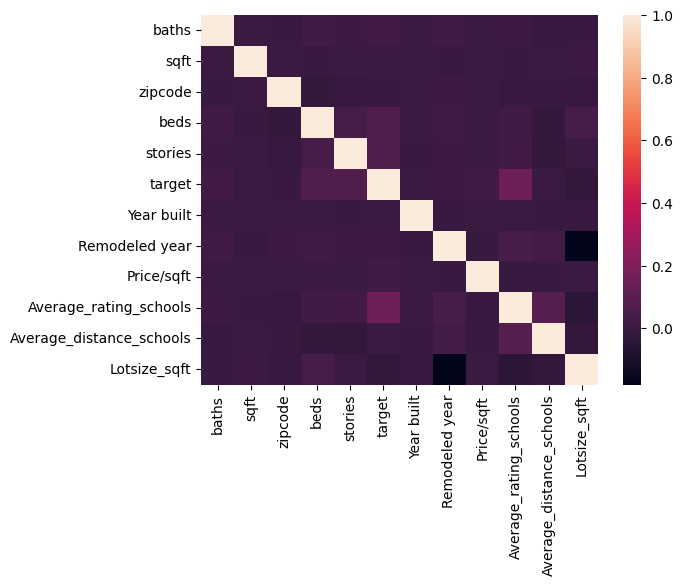

In [ ]:
sns.heatmap(fill_data.corr(numeric_only=True))

In [ ]:
# удалим поле Remodeled year
fill_data = fill_data.drop('Remodeled year', axis=1)

In [ ]:
#список неинформативных признаков
low_information_cols = []

#цикл по всем столбцам
for col in fill_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = fill_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = fill_data[col].nunique() / fill_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Неинформативные признаки не определены.

In [ ]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, fill_data_cleaned = outliers_iqr(fill_data, 'baths')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {fill_data_cleaned.shape[0]}')

Число выбросов по методу Тьюки: 2997
Результирующее число записей: 371652


In [ ]:
outliers, fill_data_cleaned = outliers_iqr(fill_data_cleaned, 'beds')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {fill_data_cleaned.shape[0]}')

Число выбросов по методу Тьюки: 484
Результирующее число записей: 371168


In [ ]:
outliers, fill_data_cleaned = outliers_iqr(fill_data_cleaned, 'stories')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {fill_data_cleaned.shape[0]}')

Число выбросов по методу Тьюки: 6994
Результирующее число записей: 364174


In [ ]:
outliers, fill_data_cleaned = outliers_iqr(fill_data_cleaned, 'Year built')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {fill_data_cleaned.shape[0]}')

Число выбросов по методу Тьюки: 62893
Результирующее число записей: 301281


In [ ]:
fill_data_cleaned.to_csv('fill_data_cleaned.csv', index = False)

In [ ]:
# fill_data_cleaned = pd.read_csv("fill_data_cleaned.csv")

In [ ]:
# Создадим эксперимент с помощью API ключа
experiment = Experiment(
    api_key="uXVHpF1uj5CLr0Dh8XqsSE7mE",
    project_name="medical-appointment",
    workspace="eka23sokol",
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, xgboost.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'c:\\Users\\User\\OneDrive\\Рабочий стол\\Data Science\\Дипломный проект' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/eka23sokol/medical-appointment/01a56262aa6449e392dcd36fb358dda0



c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



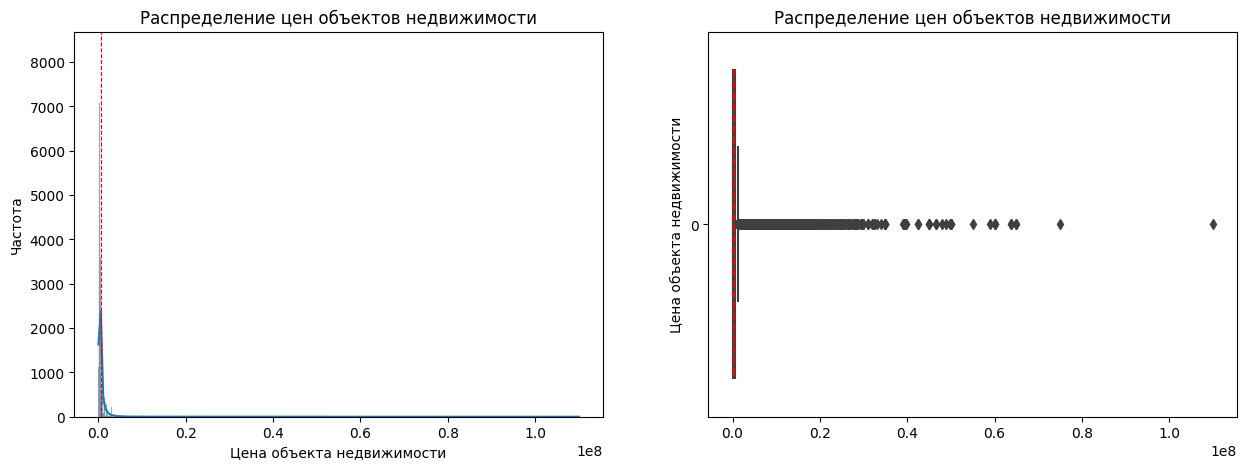

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(fill_data_cleaned['target'], kde=True, ax=axes[0])
axes[0].set(xlabel='Цена объекта недвижимости', ylabel='Частота')
axes[0].set_title('Распределение цен объектов недвижимости')
axes[0].axvline(fill_data_cleaned['target'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(fill_data_cleaned['target'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Цена объекта недвижимости')
axes[1].set_title('Распределение цен объектов недвижимости')
experiment.log_figure(figure=plt)

plt.show()

Видим, что разброс цен на недвижимость достаточно большой, поэтому определим набор данных, в которых цена на недвижимость меньше 1250000

In [ ]:
fill_data = fill_data_cleaned[fill_data_cleaned['target'] < 1250000]

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



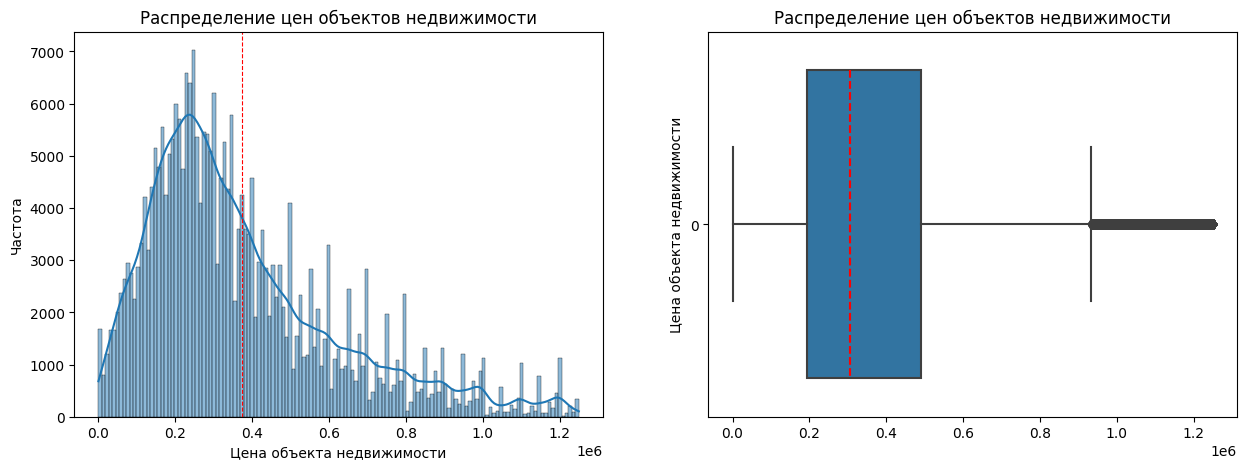

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(fill_data['target'], kde=True, ax=axes[0])
axes[0].set(xlabel='Цена объекта недвижимости', ylabel='Частота')
axes[0].set_title('Распределение цен объектов недвижимости')
axes[0].axvline(fill_data['target'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(fill_data['target'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Цена объекта недвижимости')
axes[1].set_title('Распределение цен объектов недвижимости')
experiment.log_figure(figure=plt)

plt.show()

Теперь на графиках видно, что средняя цена на недвижимость на уровне 380000, распределение отлично от нормального.

Определим распределение цен на недвижимость в зависимости от категориальных признаков.

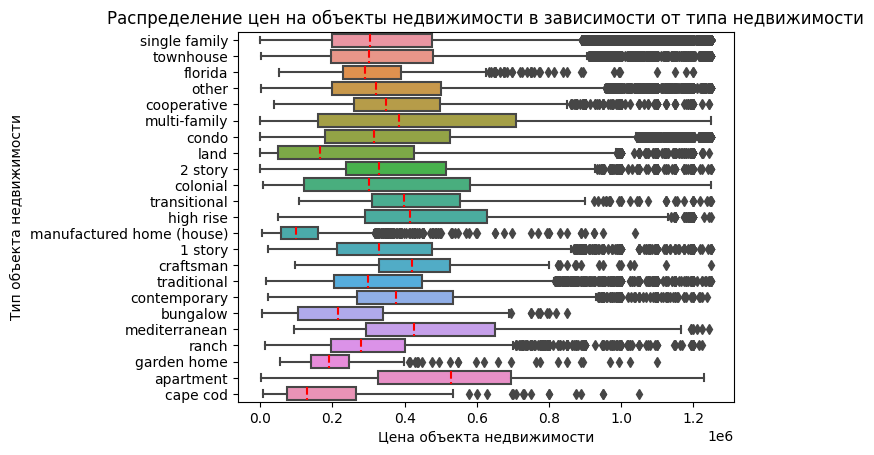

In [ ]:
ax = sns.boxplot(fill_data, x='target', y='propertyType', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Цена объекта недвижимости', ylabel='Тип объекта недвижимости')
plt.title('Распределение цен на объекты недвижимости в зависимости от типа недвижимости')
plt.show()

Минимальная средняя цена наблюдается на участки (land) и сборные дома (manufactured home (house)) - до 100 тыс., максимальная средняя цена - на квартиры (apartment), дома с высокой крышей (high rise), дома средиземноморского стиля (mediterranean). Делаем вывод, что тип объекта недвижимости влияет на цену недвижимости.

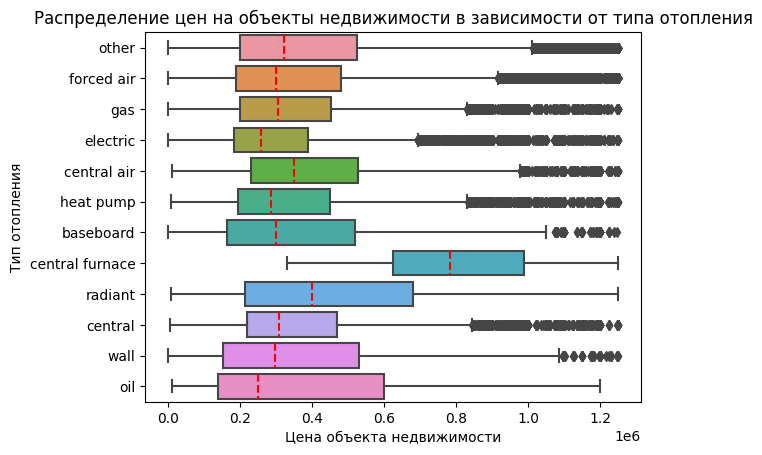

In [ ]:
ax = sns.boxplot(fill_data, x='target', y='Heating', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Цена объекта недвижимости', ylabel='Тип отопления')
plt.title('Распределение цен на объекты недвижимости в зависимости от типа отопления')
plt.show()

Видим, что средняя цена в зависимости от типа отопления практически одинаковая по всем типам отопления (до 400 тыс.), однако на недвижимость с камином (central furnace) средняя цена порядка 800 тыс. Тип отопления также влияет на формирование цены на недвижимость.

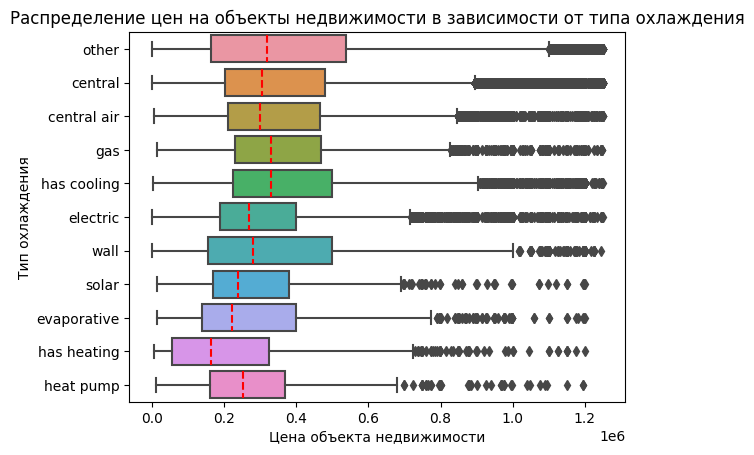

In [ ]:
ax = sns.boxplot(fill_data, x='target', y='Cooling', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Цена объекта недвижимости', ylabel='Тип охлаждения')
plt.title('Распределение цен на объекты недвижимости в зависимости от типа охлаждения')
plt.show()

Тип охлаждения не сильно влияет на цену недвижимости, средняя цена до 350 тыс.

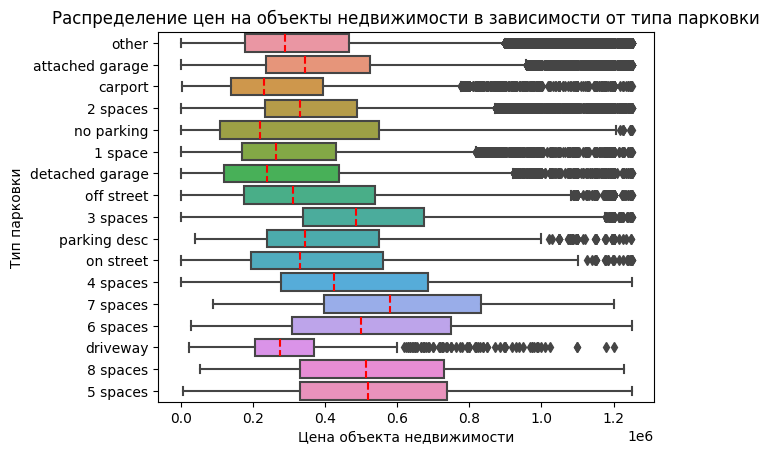

In [ ]:
ax = sns.boxplot(fill_data, x='target', y='Parking', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Цена объекта недвижимости', ylabel='Тип парковки')
plt.title('Распределение цен на объекты недвижимости в зависимости от типа парковки')
plt.show()

Видим, что тип парковки влияет на формирование цены на недвижимость - минимальная средняя цена наблюдается на недвижимость без парковки (порядка 200 тыс.), максимальная цена - где есть 7 парковочных мест (порядка 600 тыс.)

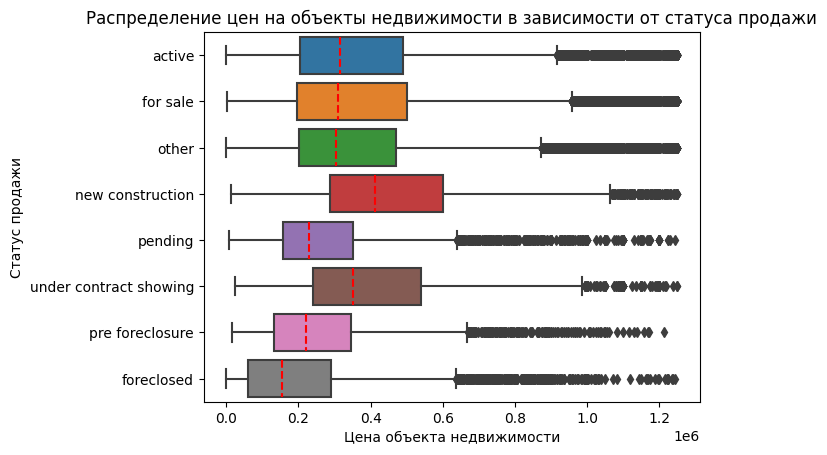

In [ ]:
ax = sns.boxplot(fill_data, x='target', y='status', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Цена объекта недвижимости', ylabel='Статус продажи')
plt.title('Распределение цен на объекты недвижимости в зависимости от статуса продажи')
plt.show()

Минимальная средняя цена наблюдается у объектов недвижимости в статусе "лишен права выкупа" (foreclosed), максимальная средняя цена у объектов со статусом "новое строительство" (new construction), но визуально статус объекта недвижимости не сильно влияет на формирование цены на недвижимость.

In [ ]:
treemap_data = fill_data.groupby(
    by='state',
    as_index=False
)[['target']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['state'], #категориальный признак, для которого строится график
    values='target', #параметр, который сравнивается
    height=500, #высота
    width=1100, #ширина
    title='Распределение цен на недвижимость в зависимости от штата' #заголовок
)

#отображаем график
fig.show()

Лидируют по ценам на недвижимость штаты DC (округ Колумбия, столица Вашингтон), CA (Калифорния), MA (Массачусетс) и NY (Нью-Йорк) - средние цены колеблются от 568 тыс., самые "дешёвые" штаты - MI (Мичиган), FI (Техас) и KY (Кентукки). Таким образом - штат достаточно сильно влияет на формирование цены на недвижимость.

## 3. Статистический анализ данных

In [ ]:
# задаём уровень значимости
alpha = 0.05

# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

In [ ]:
# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [ ]:
result = stats.shapiro(fill_data['target'])
decision_normality(result[1])

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



**Есть ли связь между ценой на недвижимость и статусом продажи**

*Нулевая гипотеза*: между ценой на недвижимость и статусом продажи нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и статусом продажи есть взаимосвязь (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Статус продажи»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['status'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
status,,,,,,,,,,,,,,,,,,,,,
active,2,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,9,1,0,2
for sale,0,0,0,3,1,1,1,0,0,0,...,1,0,1,2,1,2,25,1,2,5
foreclosed,6,1,2,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
new construction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
other,2,0,0,1,1,4,3,2,1,2,...,1,1,0,0,0,0,3,1,0,1
pending,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pre foreclosure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
under contract showing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Таким образом, между ценой недвижимости и статусом продажи есть взаимосвязь.

**Есть ли связь между ценой на недвижимость и типом охлаждения**

*Нулевая гипотеза*: между ценой на недвижимость и типом охлаждения нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и типом охлаждения есть взаимосвязь (признаки зависимы).

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['Cooling'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
Cooling,,,,,,,,,,,,,,,,,,,,,
central,5,1,0,0,0,0,0,0,0,0,...,1,0,1,2,1,2,26,1,2,6
central air,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,3,0,0,0
electric,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
evaporative,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
has cooling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
has heating,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
heat pump,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
other,4,0,2,18,2,5,4,2,1,2,...,2,1,0,0,0,0,7,2,0,1


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Тест показал, что между ценой на недвижимость и типом охлаждения есть взаимосвязь.

**Есть ли связь между ценой на недвижимость и средним рейтингом школ в районе**

*Нулевая гипотеза*: между ценой на недвижимость и средним рейтингом школ в районе нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и средним рейтингом школ в районе взаимосвязь (признаки зависимы).

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['Average_rating_schools'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
Average_rating_schools,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Средний рейтинг школ в районе не влияет на формирование цены на недвижимость.

**Есть ли связь между ценой на недвижимость и средним расстоянием до школ**

*Нулевая гипотеза*: между ценой на недвижимость и средним расстоянием до школ нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и средним расстоянием до школ есть взаимосвязь (признаки зависимы).

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['Average_distance_schools'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
Average_distance_schools,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
0.4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Среднее расстояние до школ влияет на формирование цены на недвижимость.

**Есть ли связь между ценой на недвижимость и количеством ванных комнат**

*Нулевая гипотеза*: между ценой на недвижимость и количеством ванных комнат нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и количеством ванных комнат есть взаимосвязь (признаки зависимы).

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['baths'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
baths,,,,,,,,,,,,,,,,,,,,,
0.000000,4,0,2,10,2,4,4,0,1,1,...,1,0,1,0,0,0,3,0,0,1
0.500000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.799805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.000000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.099609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.200195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1.500000,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1.799805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.000000,2,0,0,8,0,1,0,2,0,1,...,0,1,0,1,0,0,2,2,0,1


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Количество ванных комнат влияет на формирование цены на недвижимость.

**Есть ли связь между ценой на недвижимость и количеством спален**

*Нулевая гипотеза*: между ценой на недвижимость и количеством спален нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и количеством спален есть взаимосвязь (признаки зависимы).

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['beds'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
beds,,,,,,,,,,,,,,,,,,,,,
0.000000,2,0,0,3,1,0,1,1,0,0,...,1,0,1,0,0,0,5,0,0,2
1.000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.200195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.000000,0,0,1,0,0,3,1,1,0,0,...,0,0,0,1,0,0,0,2,0,0
2.300781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.000000,7,1,0,0,1,1,2,1,1,2,...,0,1,0,0,0,0,10,0,0,3
4.000000,0,0,1,5,0,1,0,0,0,0,...,2,0,1,2,1,0,12,1,2,2
5.000000,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
6.000000,1,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,1


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


По результатам теста количество спален не влияет на формирование цены на недвижимость.

**Есть ли связь между ценой на недвижимость и годом постройки недвижимости**

*Нулевая гипотеза*: между ценой на недвижимость и годом постройки недвижимости нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и годом постройки недвижимости есть взаимосвязь (признаки зависимы).

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['Year built'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
Year built,,,,,,,,,,,,,,,,,,,,,
1808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,1,0,2
2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


По результатам теста год постройки недвижимости не влияет на формирование цены на недвижимость.

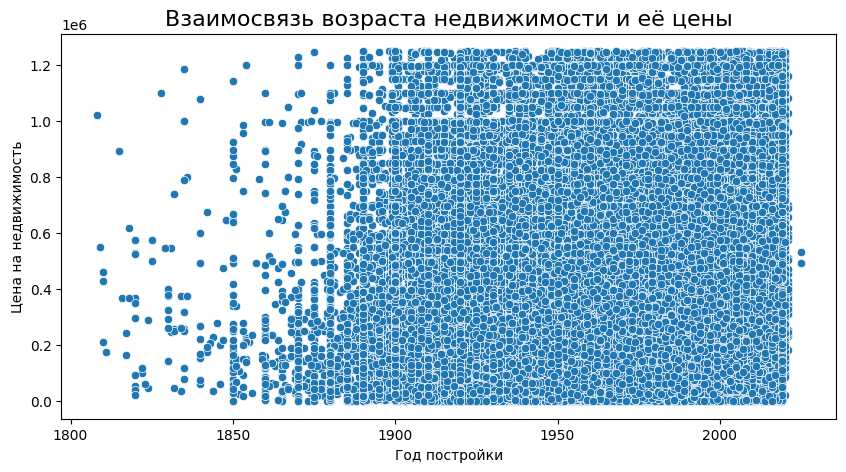

In [ ]:
# представим данные в виде диаграммы рассеяния
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=fill_data,
    x='Year built',
    y='target'

)
scatterplot.set_title('Взаимосвязь возраста недвижимости и её цены', fontsize=16)
scatterplot.set_xlabel('Год постройки')
scatterplot.set_ylabel('Цена на недвижимость');

На диаграмме рассеяния видим, что возраст недвижимости не влияет на её цену.

**Есть ли связь между ценой на недвижимость и штатом**

*Нулевая гипотеза*: между ценой на недвижимость и штатом нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между ценой на недвижимость и штатом есть взаимосвязь (признаки зависимы).

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(fill_data['state'], fill_data['target'])

cross_table

target,1,393,500,600,700,750,800,825,850,875,...,1249578,1249719,1249789,1249800,1249880,1249888,1249900,1249950,1249990,1249999
state,,,,,,,,,,,,,,,,,,,,,
AZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,3,0,2,7,0,0,3
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,0,0,0,1,1,1,0,1,0,...,3,0,2,0,1,0,4,0,2,2
Fl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0


In [ ]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Штат США определённо влияет на формирование цены на недвижимость.

In [ ]:
fill_data['stories'] = np.float16(fill_data['stories'])
fill_data['baths'] = np.float16(fill_data['baths'])
fill_data['beds'] = np.float16(fill_data['beds'])
fill_data['Average_rating_schools'] = np.float16(fill_data['Average_rating_schools'])
fill_data['Average_distance_schools'] = np.float16(fill_data['Average_distance_schools'])
fill_data['Lotsize_sqft'] = np.float16(fill_data['Lotsize_sqft'])

C:\Users\User\AppData\Local\Temp\ipykernel_16096\3046252076.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_16096\3046252076.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_16096\3046252076.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
numeric_columns = fill_data.select_dtypes(include=np.number).columns

In [ ]:
fill_data_num = fill_data[numeric_columns]

In [ ]:
#удалить строки со значениями, которые не являются конечными
fill_data_num = fill_data[np.isfinite(fill_data_num.astype(np.float64)).all(1)]

In [ ]:
fill_data_num

,status,propertyType,baths,sqft,zipcode,beds,state,stories,target,Year built,Heating,Cooling,Parking,Price/sqft,Average_rating_schools,Average_distance_schools,Lotsize_sqft
0,active,single family,3.5,2900,28387,4.0,NC,0.0,418000,2019,other,other,other,144,5.199219,5.500000,0.000000
1,for sale,single family,3.0,1947,99216,3.0,WA,2.0,310000,2019,other,other,other,159,4.000000,1.299805,5828.000000
5,for sale,townhouse,0.0,897,19145,2.0,PA,2.0,209000,1920,forced air,central,other,233,0.000000,0.000000,680.000000
6,active,florida,0.0,1507,34759,0.0,FL,0.0,181500,2006,other,central air,other,120,2.300781,3.800781,5.000000
7,active,other,0.0,0,38115,0.0,TN,0.0,68000,1976,other,other,other,57,2.699219,1.099609,8.796875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377178,other,single family,2.0,1841,77089,4.0,TX,1.0,252990,2019,other,other,2 spaces,137,6.000000,1.799805,0.000000
377179,for sale,condo,3.0,1417,20001,2.0,DC,3.0,799000,2010,forced air,central,1 space,564,3.000000,0.199951,0.000000
377180,other,single family,6.0,4017,33180,5.0,FL,0.0,1249000,1990,other,central,2 spaces,311,7.500000,16.593750,8.500000
377182,for sale,single family,3.0,1152,11434,3.0,NY,2.0,528000,1950,other,other,2 spaces,458,4.500000,0.600098,1.599609


In [ ]:
# fill_data_num.to_csv('fill_data_num.csv', index = False)

In [ ]:
# fill_data_num = pd.read_csv("fill_data_num.csv")

In [ ]:
# кодируем категориальные признаки
dummies_data = pd.get_dummies(fill_data_num, drop_first=True)
dummies_data.head()

,baths,sqft,zipcode,beds,stories,target,Year built,Price/sqft,Average_rating_schools,Average_distance_schools,...,Parking_8 spaces,Parking_attached garage,Parking_carport,Parking_detached garage,Parking_driveway,Parking_no parking,Parking_off street,Parking_on street,Parking_other,Parking_parking desc
0,3.5,2900,28387,4.0,0.0,418000,2019,144,5.2,5.5,...,False,False,False,False,False,False,False,False,True,False
1,3.0,1947,99216,3.0,2.0,310000,2019,159,4.0,1.3,...,False,False,False,False,False,False,False,False,True,False
2,0.0,897,19145,2.0,2.0,209000,1920,233,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0.0,1507,34759,0.0,0.0,181500,2006,120,2.3,3.8,...,False,False,False,False,False,False,False,False,True,False
4,0.0,0,38115,0.0,0.0,68000,1976,57,2.7,1.1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
features = dummies_data.drop('target', axis=1).columns
X, y = dummies_data[features], dummies_data['target']

In [ ]:
random_state = 42

In [ ]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=random_state #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (168526, 110)
Test shape: (42132, 110)


In [ ]:
X_train['baths'] = np.float16(X_train['baths'])
X_train['beds'] = np.float16(X_train['beds'])
X_train['stories'] = np.float16(X_train['stories'])
X_train['Average_rating_schools'] = np.float16(X_train['Average_rating_schools'])
X_test['baths'] = np.float16(X_test['baths'])
X_test['beds'] = np.float16(X_test['beds'])
X_test['stories'] = np.float16(X_test['stories'])
X_test['Average_rating_schools'] = np.float16(X_test['Average_rating_schools'])

In [ ]:
selector = SelectKBest(f_regression, k=60)
selector.fit(X_train, y_train)

best_features = selector.get_feature_names_out()
best_features

array(['baths', 'beds', 'stories', 'Year built', 'Price/sqft',
       'Average_rating_schools', 'status_foreclosed',
       'status_new construction', 'status_pending',
       'status_pre foreclosure', 'propertyType_apartment',
       'propertyType_cape cod', 'propertyType_condo',
       'propertyType_contemporary', 'propertyType_high rise',
       'propertyType_land', 'propertyType_manufactured home (house)',
       'propertyType_mediterranean', 'propertyType_multi-family',
       'propertyType_other', 'propertyType_single family',
       'propertyType_transitional', 'state_CA', 'state_CO', 'state_DC',
       'state_FL', 'state_IL', 'state_IN', 'state_MA', 'state_MI',
       'state_MO', 'state_NV', 'state_NY', 'state_OH', 'state_OR',
       'state_PA', 'state_TN', 'state_TX', 'state_VA', 'state_WA',
       'state_WI', 'Heating_central air', 'Heating_central furnace',
       'Heating_electric', 'Heating_forced air', 'Heating_other',
       'Heating_radiant', 'Cooling_has cooling', 'Coo

In [ ]:
X_train = X_train[best_features]
X_test = X_test[best_features]

In [ ]:
#Инициализируем стандартизатор MinMaxScaler()
scaler = preprocessing.MinMaxScaler()#preprocessing.MinMaxScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)

In [ ]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [ ]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.352
Train MAE: 146277.714
Train MAPE: 472.356


Test R^2: 0.352
Test MAE: 146196.881
Test MAPE: 472.175


Выводы:
- MAE: в среднем модель линейной регрессии ошибается на  146196 долларов.
- MAPE: модель ошибается на 472 %
- R^2: доля объясняемой информации (дисперсии), которую улавливает модель, — 0.352.

Очевидно, что по всем метрикам модель линейной регрессии плохо предсказывает цену на недвижимость.

In [ ]:
# произведём логирование параметров обучения
params={"random_state":random_state,
        "model_type":"lr"
}

In [ ]:
experiment.log_parameters(params)

In [ ]:
# # логирование метрик
r2_score = metrics.r2_score(y_train, y_train_pred)
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mape = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
test_r2_score = metrics.r2_score(y_test, y_test_pred)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)


In [ ]:
metrics = {'Train R^2':r2_score, 'Train MAE': mae, 'Train MAPE': mape, 'Test R^2':test_r2_score, 'Test MAE': test_mae, 'Test MAPE': test_mape}

In [ ]:
experiment.log_metrics(metrics)

In [ ]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test)

In [ ]:
#Выводим результирующие размерности таблиц
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(168526, 1890)
(42132, 1890)


In [ ]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

AttributeError: 'dict' object has no attribute 'r2_score'

Выводы:
- MAE: в среднем модель линейной регрессии полинома 2 степени ошибается на  107219 долларов.
- MAPE: модель ошибается на 321 %
- R^2: доля объясняемой информации (дисперсии), которую улавливает модель, — 0.424.

Метрики уже гораздо лучше, но результат ещё не совсем устраивает.

In [ ]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr = linear_model.Lasso(alpha=0.1)
#Обучаем модель
lasso_lr.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_pred_poly = lasso_lr.predict(X_train_scaled_poly)
y_test_pred_poly = lasso_lr.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred_poly, y_test, y_test_pred_poly)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e+15, tolerance: 1.033e+12



Train R^2: 0.592
Train MAE: 108673.765
Train MAPE: 200.831


Test R^2: 0.406
Test MAE: 110032.790
Train MAPE: 526.856


По метрикам модель линейной регрессии с L1-регуляризацией с коэффициентом alpha=0.1 показала результат хуже, чем предыдущая модель. Продолжаем улучшать параметры обучения модели.

In [ ]:
#Создаём объект класса градиентного бустинга
gbr = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)
#Обучаем модель
gbr.fit(X_train_scaled_poly, y_train)

#Делаем предсказание для тренировочной выборки
y_train_pred_poly = gbr.predict(X_train_scaled_poly)
y_test_pred_poly = gbr.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred_poly, y_test, y_test_pred_poly)

Train R^2: 0.829
Train MAE: 68717.709
Train MAPE: 299.630


Test R^2: 0.783
Test MAE: 75634.681
Train MAPE: 427.648


Выводы:
- MAE: в среднем модель градиентного бустинга ошибается на  75634 долларов.
- MAPE: модель ошибается на тестовой выборке на 427 %
- R^2: получили хороший показатель по доли объясняемой информации (дисперсии), которую улавливает модель, — 0.783.

В целом не плохой результат, однако попробуем настроить оптимизацию гиперпараметров для алгоритма градиентного бустинга.

In [ ]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  #learning_rate = trial.suggest_int('learning_rate', 0.1, 1, 0.1)
  n_estimators = trial.suggest_int('n_estimators', 50, 200, 1)
  max_depth = trial.suggest_int('max_depth', 1, 10, 1)
  min_samples_split = trial.suggest_int('min_samples_split', 10, 50, 1)

  # создаем модель
  model = ensemble.GradientBoostingRegressor(learning_rate=0.5,
                                             n_estimators=n_estimators,
                                             max_depth=max_depth,
                                             min_samples_split=min_samples_split,
                                             random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.r2_score(y_train, model.predict(X_train))

  return score

In [ ]:
%%time
# cоздаем объект исследования
study = optuna.create_study(study_name="GradientBoostingRegressor", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2025-04-25 11:55:38,550] A new study created in memory with name: GradientBoostingRegressor
C:\Users\User\AppData\Local\Temp\ipykernel_10668\4019534067.py:6: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

C:\Users\User\AppData\Local\Temp\ipykernel_10668\4019534067.py:7: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

C:\Users\User\AppData\Local\Temp\ipykernel_10668\4019534067.py:8: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

[I 2025-04-25 11:57:30,393] Trial 0 finished with value: 0.8349154245118009 and parameters: {'n_estimators': 158, 'max_depth': 6, 'min_samples_split': 46}. Best is trial 0 with value: 0.8349154245118009.
C:\Users\User\AppData\Local\Temp\ipykernel_10668\4019534067.py:6: FutureWarning:

suggest_int() got {'step'} as positional argum

CPU times: total: 45min 29s
Wall time: 46min 37s


In [ ]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("r2_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 174, 'max_depth': 10, 'min_samples_split': 22}
r2_score на обучающем наборе: 0.93


In [ ]:
# рассчитаем точность для тестовой выборки
model = ensemble.GradientBoostingRegressor(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)

#Делаем предсказание для тренировочной выборки
y_train_pred_poly = model.predict(X_train)
y_test_pred_poly = model.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred_poly, y_test, y_test_pred_poly)

Train R^2: 0.867
Train MAE: 59364.813
Train MAPE: 198.899


Test R^2: 0.807
Test MAE: 70060.459
Train MAPE: 327.630


Выводы:
- MAE: в среднем модель градиентного бустинга ошибается на  70060 долларов.
- MAPE: модель ошибается на тестовой выборке на 327 %
- R^2: ещё более улучшили показатель по доли объясняемой информации (дисперсии), которую улавливает модель, — 0.807.

Благодаря оптимизации гипермараметров с помощью Optuna удалось улучшить качество модели.

Таким образом, наилучший результат показала модель машинного обучения класса градиентного бустинга с подобранными гиперпараметрами.

In [ ]:
experiment.display()

In [ ]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/eka23sokol/medical-appointment/01a56262aa6449e392dcd36fb358dda0
COMET INFO:   Metrics:
COMET INFO:     Test MAE   : 146196.88065038575
COMET INFO:     Test MAPE  : 4.721746156810575
COMET INFO:     Test R^2   : 0.3524390615196459
COMET INFO:     Train MAE  : 146277.71433925992
COMET INFO:     Train MAPE : 4.723559425524709
COMET INFO:     Train R^2  : 0.3523608446226938
COMET INFO:   Parameters:
COMET INFO:     model_type   : lr
COMET INFO:     random_state : 42
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook  